# 导入库

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['font.family']='youyuan'
plt.rcParams['axes.unicode_minus']=False

# 导入数据 数据预处理

In [2]:
data=pd.read_excel('B站新榜_综合指数榜单.xlsx',parse_dates=['获赞数','播放数','弹幕数','获赞数','播放数'])
data['时间']=pd.to_datetime(data['时间'])

In [3]:
data.duplicated().sum()
#检查得无重复值

0

# 等级分析饼状图

In [4]:
#提取等级数据
data_level=data['等级'].value_counts()
data_level

6    10791
5      721
4      230
3      110
2       57
0        7
1        1
Name: 等级, dtype: int64

In [5]:
#将等级数据放入空列表中
i=0
sum=0
list1=[]
for i in range(7):
    datai=data.loc[data['等级']==i]
    x=len(datai)
    list1.append(x)
    i+=1
for i in range(5):
    sum=sum+list1[i]
    i+=1
list2=[sum,list1[5],list1[6]]
list2

[405, 721, 10791]

([<matplotlib.patches.Wedge at 0x1e3b2a769a0>,
 [Text(1.3920281087843784, 0.1491902957775301, '0-4级'),
  Text(1.2875108140632918, 0.5498326142291667, '5级'),
  Text(-1.3387721291796364, -0.4094987010135961, '6级')],
 [Text(0.9943057919888417, 0.10656449698395007, '3.40%'),
  Text(0.9196505814737799, 0.39273758159226196, '6.05%'),
  Text(-0.9562658065568832, -0.29249907215256865, '90.55%')])

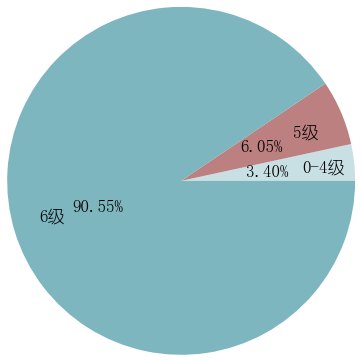

In [6]:
labels='0-4级','5级','6级'
plt.pie(list2,labels=labels,
autopct='%.2f%%',#展示百分比
pctdistance=0.5,#调整文字到圆心的位置
labeldistance=0.7,#图例与圆心的位置
colors=['#c8e0e4','#bc8080','#7db6bf'],
radius=2,#饼图半径大小
textprops={'fontsize':17}#设置文字标签格式
)

## 分析结果
+ 由于B站有经验等级规则，在B站规则制度下，投稿视频得到的硬币会转换为经验，因此可以根据用户的等级判断活跃度及视频流量：等级为3及以下的，为非活跃用户；4或5级的为活跃用户；而6级的账号，为投稿数特别多特别火爆或者活跃时间达3年及以上的B站的骨干用户。B站的等级制度会吸引普通用户增加投稿量，吸引更多用户进入B站观看视频，从而提高产品知名度。观察上榜数据绘制的饼状图，6级用户占90%以上，可以得知，B站的骨干用户仍保持着极高的粘合性；而其中10%左右的其他等级用户，则可以得出用户量的增加，有更多用户进入到B站中开始投稿视频；综上可以得出，B站的普及率在提高，未来会有更多的用户进入B站，B站仍可以继续扩大其未来的市场。

# 周榜分析直方图

In [7]:
#提取周榜数据
data_week=data.loc[data['榜单类型']=='周榜']

In [8]:
#将数据转换成数值并放入列表
data1=[]
data2=[]
data3=[]
for i in data_week['播放数']:
    if 'w' in i:
        data_number=float(i.replace('w','0000'))*1e4
        data1.append(data_number)
    else:
        data_number=i
        data1.append(data_number)

for i in data_week['弹幕数']:
    if 'w' in i:
        data_number=float(i.replace('w','0000'))*1e4
        data2.append(data_number)
    else:
        data_number=i
        data2.append(data_number)

for i in data_week['获赞数']:
    if 'w' in i:
        data_number=float(i.replace('w','0000'))*1e4
        data3.append(data_number)
    else:
        data_number=i
        data3.append(data_number)

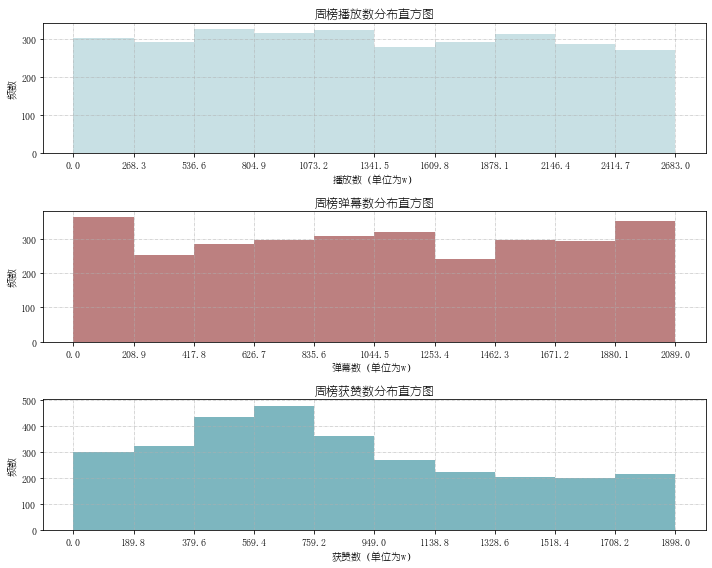

In [9]:
#绘制子图组合
Fig=plt.figure(figsize=(10,8))
Fig.add_subplot(3,1,1)
a=plt.hist(data1, bins=10,color=['#c8e0e4'])
plt.xticks(a[1],np.around(a[1],1))
plt.xlabel('播放数（单位为w）')
plt.ylabel('频数')
plt.grid(linestyle='-.',linewidth=0.5,axis='both')
plt.title('周榜播放数分布直方图')

Fig.add_subplot(3,1,2)
b=plt.hist(data2, bins=10,color=['#bc8080'])
plt.xticks(b[1],np.around(b[1],1))
plt.xlabel('弹幕数（单位为w）')
plt.ylabel('频数')
plt.grid(linestyle='-.',linewidth=0.5,axis='both')
plt.title('周榜弹幕数分布直方图')

Fig.add_subplot(3,1,3)
c=plt.hist(data3, bins=10,color=['#7db6bf'])
plt.xticks(c[1],np.around(c[1],1))
plt.xlabel('获赞数（单位为w）')
plt.ylabel('频数')
plt.grid(linestyle='-.',linewidth=0.5,axis='both')
plt.title('周榜获赞数分布直方图')

plt.tight_layout()

## 分析结果
+ 1.播放量：在各个阶段的频数都很高，低播放量的数据代表了不断有新用户进入B站，B站的使用规模扩大，高播放量的数据代表了B站的骨干用户的活跃度未降低，而位于中部的数据是B站的成长型up主的持续增长；结合B站推出的创作者激励计划，可以看出，用户数量在未来会继续增长且用户需求也不断扩大，B站当前的商业价值很高且未来仍可以处于上升阶段。
+ 2.弹幕数：由图，两端数据较高而中间数据较为平缓，基本呈现上升趋势，结合B站弹幕机制并调研，可得知，用户相对于观看视频和点赞，进行发弹幕等行为会花费相对来说的较多时间，因此，对于弹幕数据高的视频，分析其视频内容等，可得知用户的关注点更多的落在哪一方面，而针对性地制作视频可以为软件引来更多流量，吸引更多新用户。
+ 3.获赞数：获赞数的最高峰略靠近图像右边，即其高获赞量的视频仍有进步空间，数量仍有待提高，针对此方向进行开展如“创作者激励计划”等活动，可以进一步提高用户数量和和用户粘合度。

# 上榜视频个数折线图

In [10]:
#提取月榜日榜
data_month=data.loc[data['榜单类型']=='月榜']
data_day=data.loc[data['榜单类型']=='日榜']

#删去多余列以便统计数据
list3=['up主标签','性别','up主','头像','榜单类型','创作领域','投币数','涨粉数','等级','获赞数','投稿视频数','播放数','排名','类型','弹幕数']
ans1=data_week.drop(list3,axis=1)
ans2=data_month.drop(list3,axis=1)
ans3=data_day.drop(list3,axis=1)

df1=ans1.groupby('时间').count()
df2=ans2.groupby('时间').count()
df3=ans3.groupby('时间').count()

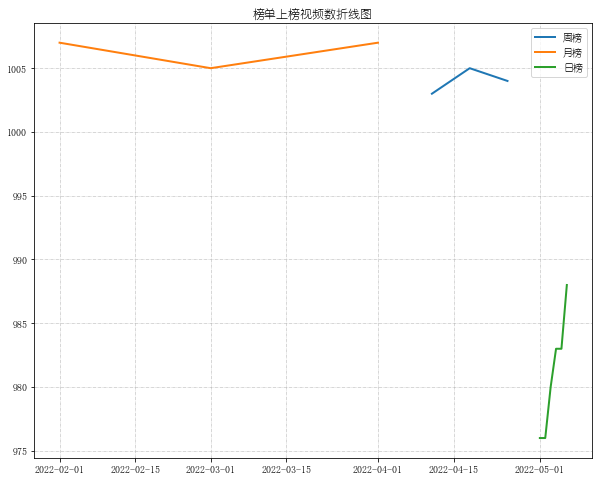

In [11]:
Fig=plt.figure( figsize=(10,8))
plt.plot(df1,label='周榜',linewidth=2)
plt.plot(df2,label='月榜',linewidth=2)
plt.plot(df3,label='日榜',linewidth=2)
plt.legend(loc=1)
plt.title('榜单上榜视频数折线图',loc='center')
plt.grid(linestyle='-.',linewidth=0.5,axis='both')

## 分析结果
+ 周榜：本数据表中仅有四月（11，18，25）数据，由折线图可看出，4月前几天上榜视频数呈上升趋势，在达到一个峰点之后又逐渐下降，可大致看出，4月中旬B站的视频制作量上升，用户活跃度增高。
+ 月榜：月榜数据仅有2，3，4每月第一天的数据，综合大致曲线可以看出，2月结合时间点在春节左右，用户空闲时间较多，可以投入制作视频；三月靠近开学季，工作单位也开始复工，空余时间被挤占，视频制作量下降，上榜视频数也随之下降；四月在时间稳定后，上榜视频数又重新上升，用户活跃度恢复。
+ 日榜：日榜数据仅有5月前6天，结合时间点可以看出，5月劳动节假期，用户活跃度大幅增加，上榜视频数呈急速上升趋势，流量也大幅增长，此时推广“创作者激励”计划等引流方法，可取的较好效果，进一步扩大用户量。

# 散点图

In [12]:
#将投币数的数据转换成数值并放入空列表
data_coin=data['投币数'].values
list3=[]
for i in data_coin:
    if 'w' in i:
        data_number=float(i.replace('w','0000'))*1e4
        list3.append(data_number)
    else:
        data_number=float(i)*1
        list3.append(i)

#将列表中str类型数据转换成float型并按递增顺序排列
list3=np.array(list3)
list3=list3.astype(float).tolist()
list3.sort()

In [13]:
data_likes=data['获赞数'].values
list4=[]
for i in data_likes:
    if 'w' in i:
        data_number=float(i.replace('w','0000'))*1e4
        list4.append(data_number)
    else:
        data_number=float(i)
        list4.append(i)

list4=np.array(list4)
list4=list4.astype(float).tolist()
list4.sort()

Text(0.5, 1.0, '获赞数与投币数的关系')

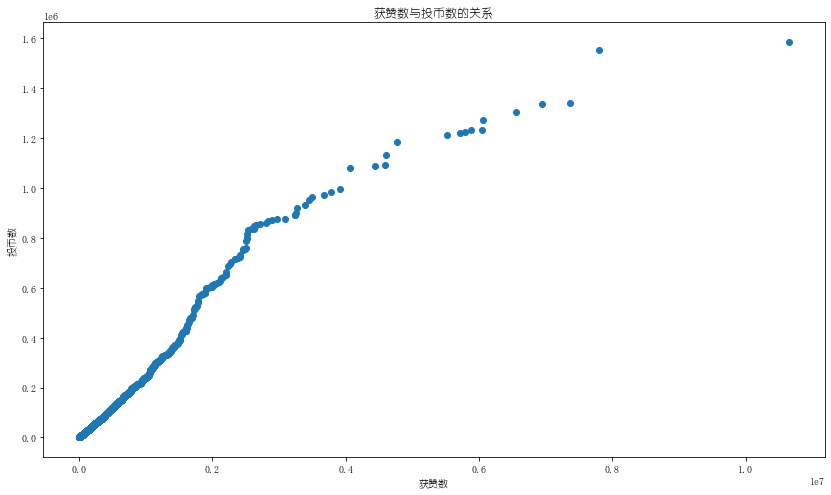

In [14]:
Fig=plt.figure( figsize=(14,8))
plt.scatter(list4,list3)
plt.xlabel('获赞数')
plt.ylabel('投币数')
plt.title('获赞数与投币数的关系',loc='center')

## 分析探究两者关系
+ 观看散点图的分布，数据大量重叠描绘出一条清晰的线条，可看出，获赞数与投币数的关系呈正比例上升趋势，随着获赞数数值量增大，其投币数也扩大，而两项数值都很大的点逐渐分散也可看出极端火爆的视频符合正态分布曲线，呈极少数。而观察散点图的大致曲线，较高于y=x直线，也符合获赞数在一般情况下高于投币数的规律。可以得出两者关系：获赞数和投币数呈正比，基本符合y=x直线，同时，获赞数也会略高于投币数。

# 柱状图

In [15]:
#只有日榜有五月数据，提取出来
pd1=data_day.groupby('创作领域')['时间'].count()

#将月榜中的二三四月数据分开
pd2=data_month[data_month['时间'].dt.month==2]
pd3=data_month[data_month['时间'].dt.month==3]
pd4=data_month[data_month['时间'].dt.month==4]
pd2=pd2.groupby('创作领域')['时间'].count()
pd3=pd3.groupby('创作领域')['时间'].count()
pd4=pd4.groupby('创作领域')['时间'].count()

#x轴标签
label1=['动物圈','动画','国创','娱乐','影视','数码','时尚','汽车','游戏','生活','电影','电视剧','番剧','知识','科技','纪录片','美食','舞蹈','资讯','运动','音乐','鬼畜']

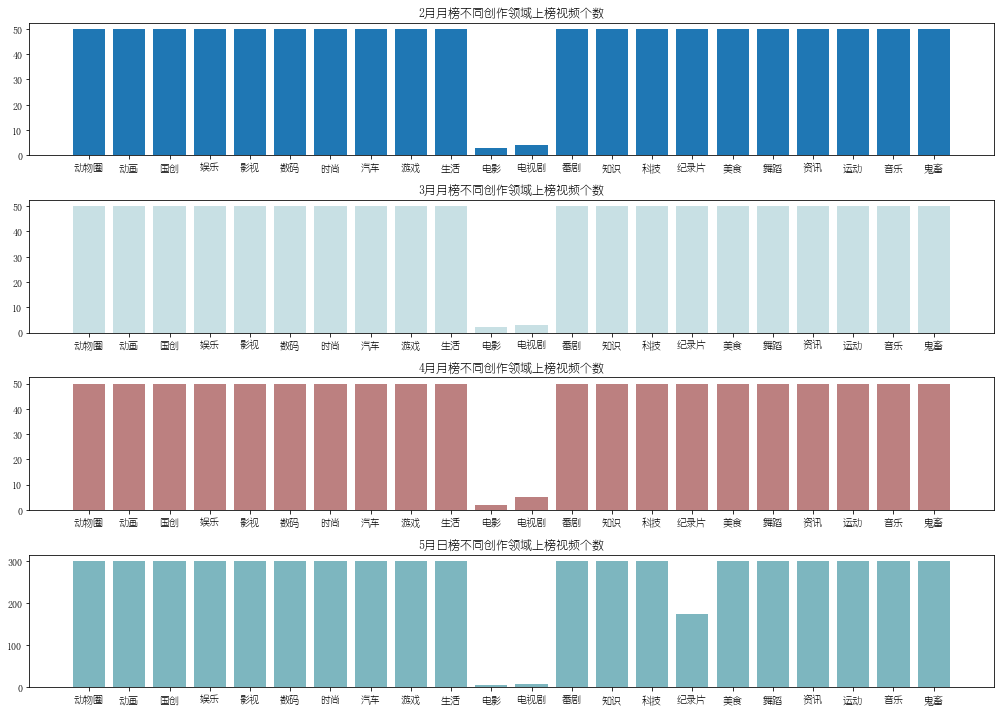

In [16]:
Fig=plt.figure( figsize=(14,10))

Fig.add_subplot(4,1,1)
plt.bar(label1,pd2)
plt.title('2月月榜不同创作领域上榜视频个数',loc='center')

Fig.add_subplot(4,1,2)
plt.bar(label1,pd3,color=['#c8e0e4'])
plt.title('3月月榜不同创作领域上榜视频个数',loc='center')

Fig.add_subplot(4,1,3)
plt.bar(label1,pd4,color=['#bc8080'])
plt.title('4月月榜不同创作领域上榜视频个数',loc='center')

Fig.add_subplot(4,1,4)
plt.bar(label1,pd1,color=['#7db6bf'])
plt.title('5月日榜不同创作领域上榜视频个数',loc='center')

plt.tight_layout()

## 分析结果
+ 综合榜单整体数据可以得知，除电影电视剧这两个领域的创作视频数一直处于低数量状态外，其余的领域视频的数量都很高，纪录片在日榜中的数据量略位于中游水平，但从月榜整体来看纪录片的视频总数仍处于高数量阶段。分析电影电视剧领域的问题，与国内影视领域作品创新不足，以及短视频的普及导致用户普遍没耐心去观看一部时间相对来讲较长的影视剧有关；而电影作品制作周期长，在日榜月榜等榜单中无法展现出较高数据量，在时间跨度更长的榜单中会更有分析价值。